<a href="https://colab.research.google.com/github/yuvaravii/Telecom_churn_analysis_capstone1/blob/main/Capstone_project_Ravishankar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. 

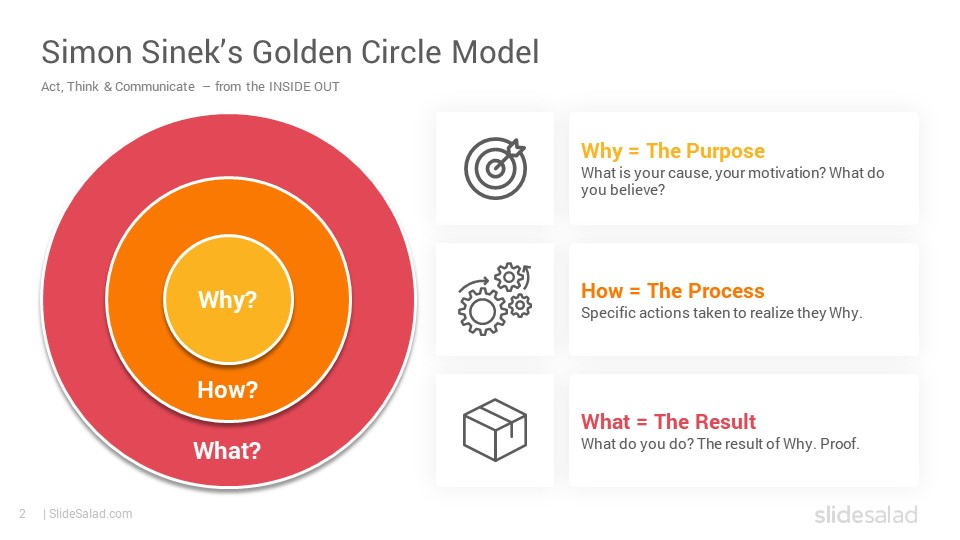

In any business or analysis the "why" is  not a afterthought it is a forethought to be carried. The inspiration or a feel a satisfaction can be achieved only after the question process of "why". When we have a reason to work we extract the passion, maximum effort,quality etc not by manipulation but the intention.
How refers to the process in achieving the goal.
What refers to the output that your going to achieve in basis of your why belief.


Application of Golder circle In Dataset


ESTABLISHING THE WHY:- 

1.   WHY? -We establish a service to make the communication way more easier and effective.
2.   HOW? - By doing EDA and analysing the invidual factor affecting the churn. This allows the company to improve continuously according to humanitary needs.
3.   WHAT? - A undisputable service that a customer can rely upon for 24X7.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/Capstone project/Telecom Churn.csv'
telecom_df = pd.read_csv(file_path)

In [ ]:
df= telecom_df.copy()
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


DESCRIPTION OF PARAMETERS:
 
1.   STATE: the place of customer residence
2.   ACCOUNT LENGTH : The period of stay of customer with organisation
3.   AREA CODE: Another name for Dialing Code
4.   INTERNATIONAL PLAN:Network used beyond the home network.
5.   VOICE MAIL PLAN: availability of plan to execute and transact the voice messages
6.   NUMBER VMAIL MESSAGES: Number of voice mail messages.
7.   TOTAL DAY MINUTES: Amount of minutes spent in day call.
8.   TOTAL DAY CALLS : Number of calls dialed during day.
9.   TOTAL DAY CHARGE: total Cost for calls dialed in day.
10.  TOTAL EVE MINUTES: Minutes used for call during evening
11.  TOTAL EVE CALLS: Number of calls during evening.
12.  TOTAL EVE CHARGE: Cost bared by calls in evening
13.  TOTAL NIGHT MINUTES: Minutes spent during night in call
14.  TOTAL NIGHT CALLS: Number of calls in night
15.  TOTAL NIGHT CHARGE: total charge for night call minutes.
16.  TOTAL INTL MINUTES: Minutes spent in the international call
17.  TOTAL INTL CALLS: Number of international call
18.  TOTAL INTL CHARGE:  Total charges for minutes spent in total no. of internation call
19.  CUSTOMER SERVICE CALLS: Number of customer service calls attended.





#Step 1 : Data Exploration and Preparation
##Step 1.1: Variable identification.
##Step 1.2 : Univariate Analysis
##step 1.3 : BI- variate Analysis

Step 1.1: Variable identification.


**Input_variables** =['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes','Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

**Ouput_variables**=['Churn']

In [ ]:
# find the data type of each input
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

The above revealed information clearly depicts that our data has
 ## No Null data
 ## Categorical data are the column has the datatype of bool & object
 ## Continous data are the column that has the datatype as int64 & float 64


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.shape

(3333, 20)

In [ ]:
df.size

66660

## Step 1.2 : Univariate Analysis
since our data consist of both categorical and continuos data we plot box chart,pie chart & histogram.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0df019850>,
      dtype=object)

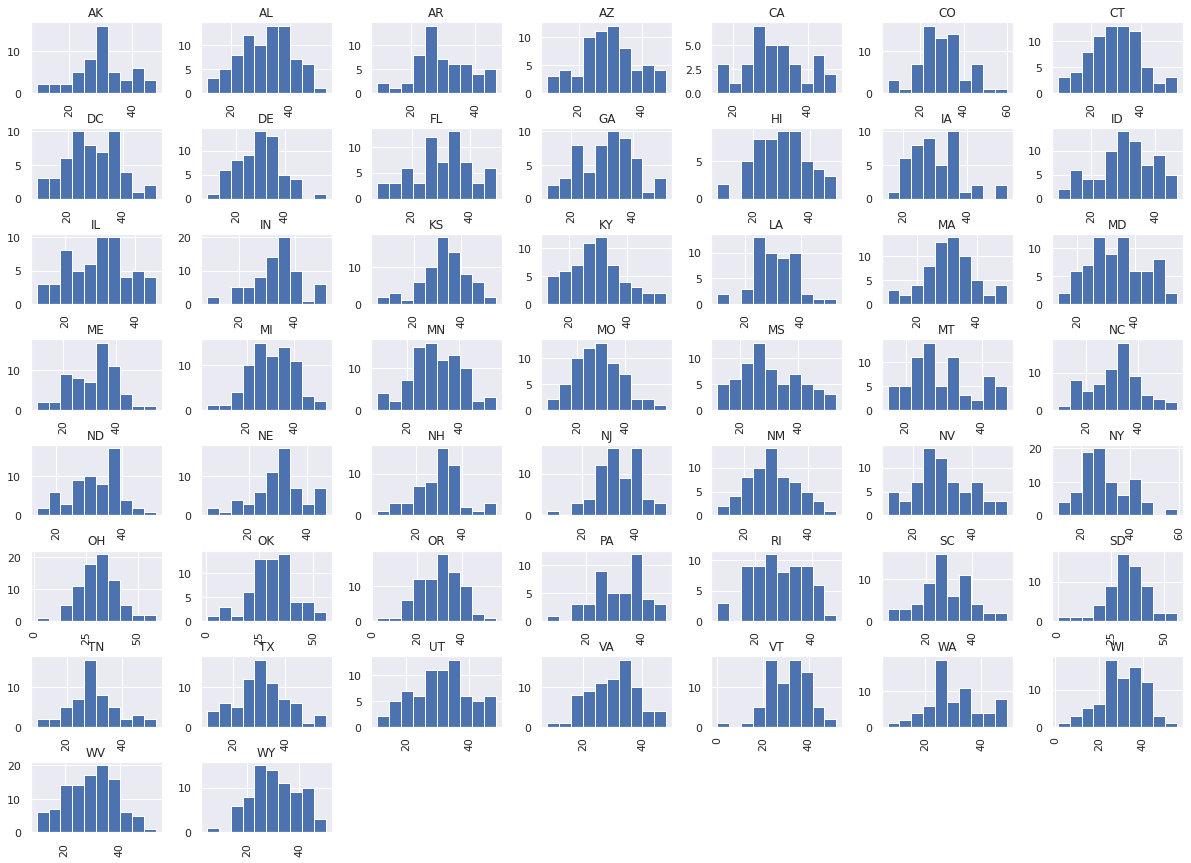

In [ ]:
df.hist(column='Total day charge',by='State',figsize=(20,15))

The parameter data types are found in compatible with the parameter of DF.


1.   Null data= there is no null data in either of the rows.So there is no filling of data required.








Our goal right now is to analyse the cause for Churn rate inorder to do that we shall calculate the churn rate.

In [ ]:
customer_left_df=df[df['Churn']==True]
customer_retained_df=df[df['Churn']==False]

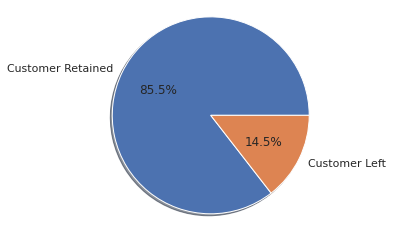

In [ ]:
sizes=telecom_df.value_counts('Churn')
labels=['Customer Retained','Customer Left']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

We can conclude that 14.5% of total population had been churned and 85.5% of the total population is retained.
 

In [ ]:
international_plan_distribution=df['International plan'].reset_index().groupby('International plan').count().transpose()
international_plan_distribution

International plan,No,Yes
index,3010,323


Text(0, 0.5, 'count')

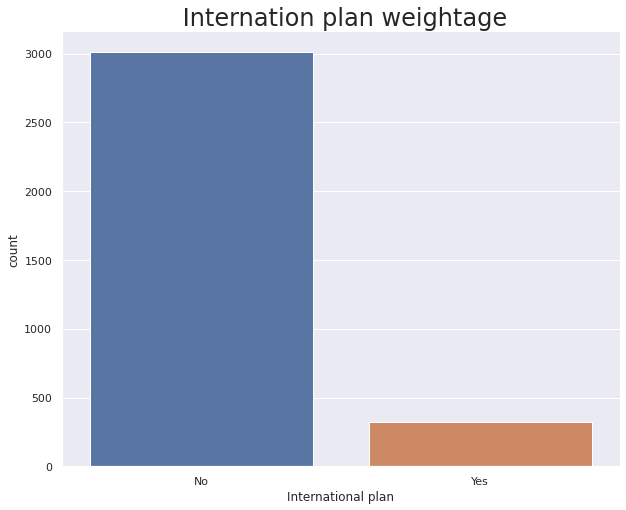

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 8 ))
sns.barplot(data=international_plan_distribution)
ax.set_title(" Internation plan weightage",size=24) 
ax.set_xlabel("International plan",size=12) 
ax.set_ylabel("count",size=12) 

In [ ]:
international_plan_distribution=customer_left_df['International plan'].reset_index().groupby('International plan').count().transpose()
international_plan_distribution

International plan,No,Yes
index,346,137


Text(0, 0.5, 'count')

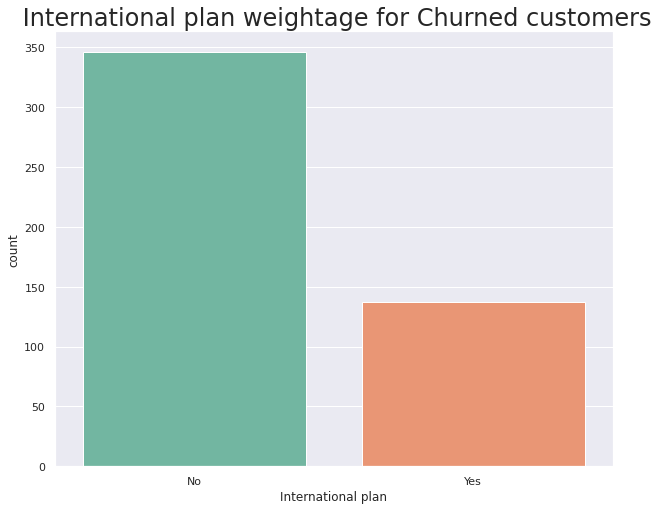

In [ ]:
#customer_left_df
fig, ax = plt.subplots(figsize = ( 10 , 8 ))
sns.barplot(data=international_plan_distribution, palette='Set2')
ax.set_title(" International plan weightage for Churned customers",size=24) 
ax.set_xlabel("International plan",size=12) 
ax.set_ylabel("count",size=12) 

## Here we can observe that most of the population did not opt for international plan. We have to understand why people did not opt for internatinal plan.

In [ ]:
df.groupby('International plan')['Total intl calls'].sum()

International plan
No     13441
Yes     1489
Name: Total intl calls, dtype: int64

In [ ]:
df.groupby('International plan')['Total intl charge'].mean()

International plan
No     2.753279
Yes    2.869907
Name: Total intl charge, dtype: float64

In [ ]:
df.groupby('International plan')['Total intl minutes'].sum()

International plan
No     30688.0
Yes     3432.9
Name: Total intl minutes, dtype: float64

# Here we can observe that customers with NO international plan has used the facility of international calls. Almost 90 % of customer , Hence we have to recousel the charges and the service quality for international plan.


In [ ]:
voice_mail_plan_distribution=df['Voice mail plan'].reset_index().groupby('Voice mail plan').count().transpose()
voice_mail_plan_distribution

Voice mail plan,No,Yes
index,2411,922


# We have to reconcile the voice mail plan as it is an emergency facility. this may be an very important characterstic for churning of customers. Atleast we provide them a one free voice mail message or we can opt for postpaid charges facility.

Text(0, 0.5, 'COUNT')

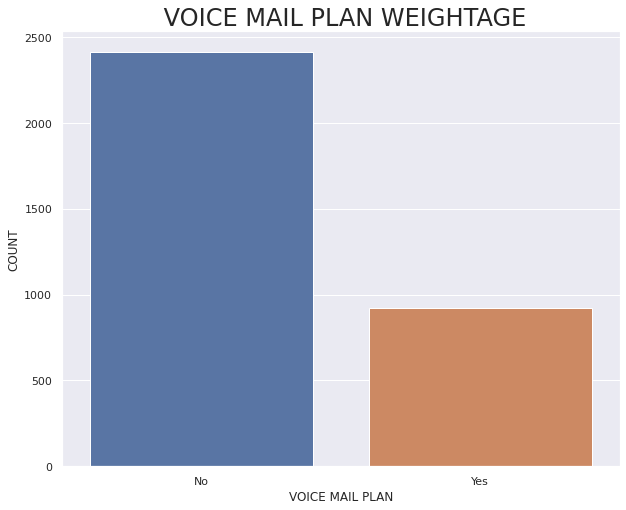

In [ ]:
# weightage for all customers
fig, ax = plt.subplots(figsize = ( 10 , 8 ))
sns.barplot(data=voice_mail_plan_distribution)
ax.set_title(" VOICE MAIL PLAN WEIGHTAGE",size=24) 
ax.set_xlabel("VOICE MAIL PLAN",size=12) 
ax.set_ylabel("COUNT",size=12) 

In [ ]:
voice_mail_plan_distribution_churnedcustomer=customer_left_df['Voice mail plan'].reset_index().groupby('Voice mail plan').count().transpose()
voice_mail_plan_distribution_churnedcustomer

Voice mail plan,No,Yes
index,403,80


Text(0, 0.5, 'COUNT')

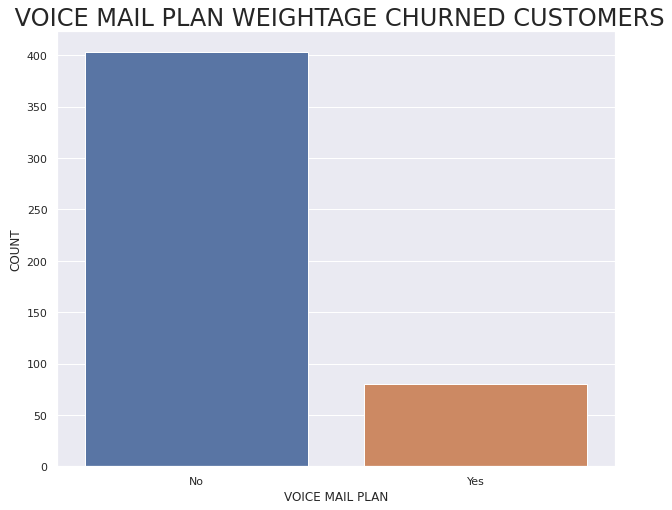

In [ ]:
# weightage for churn customers
fig, ax = plt.subplots(figsize = ( 10 , 8 ))
sns.barplot(data=voice_mail_plan_distribution_churnedcustomer)
ax.set_title(" VOICE MAIL PLAN WEIGHTAGE CHURNED CUSTOMERS",size=24) 
ax.set_xlabel("VOICE MAIL PLAN",size=12) 
ax.set_ylabel("COUNT",size=12) 

In [ ]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


# Now checking for charges and calls column to check the impact of the parameter on churn


Text(0, 0.5, 'NUM_OF_CALLS')

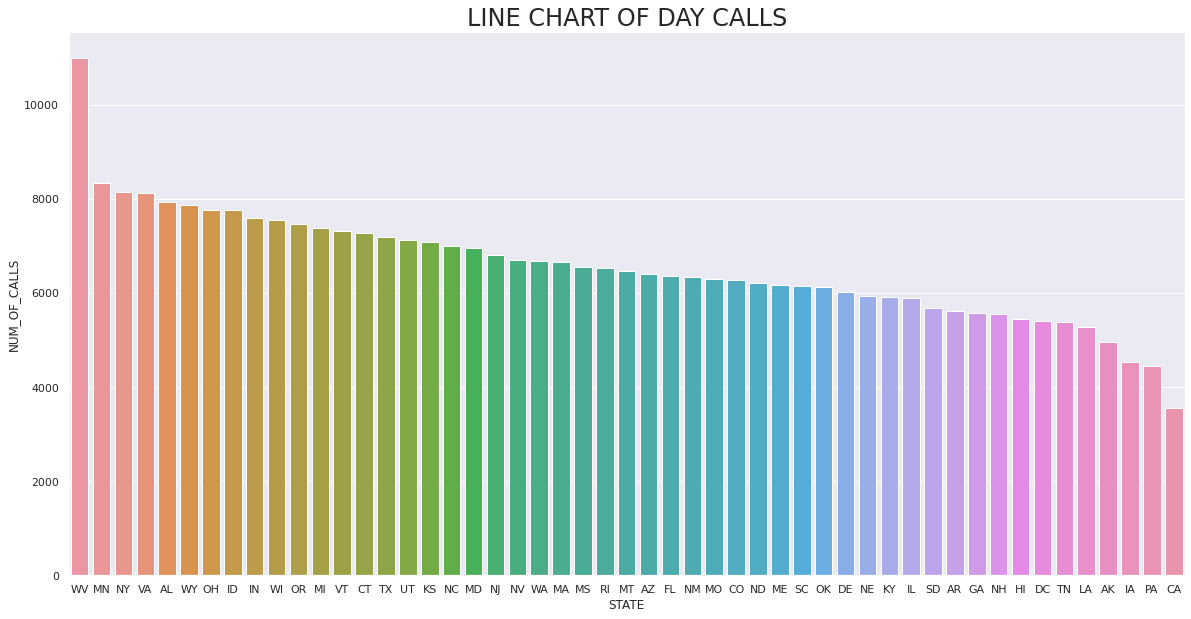

In [ ]:
day_calls_statewise =df.groupby('State',as_index=False)['Total day calls'].sum().sort_values('Total day calls',ascending=False)
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
ax = sns.barplot(x="State", y="Total day calls",data=day_calls_statewise)
ax.set_title("LINE CHART OF DAY CALLS",size=24) 
ax.set_xlabel("STATE",size=12) 
ax.set_ylabel("NUM_OF_CALLS",size=12) 

In [ ]:
day_calls_statewise.head(3)

,State,Total day calls
49,WV,11001
23,MN,8326
34,NY,8154


All the calls shows us that, the state WV has more number of usage relative to other states.

Text(0, 0.5, 'NUM_OF_CALLS')

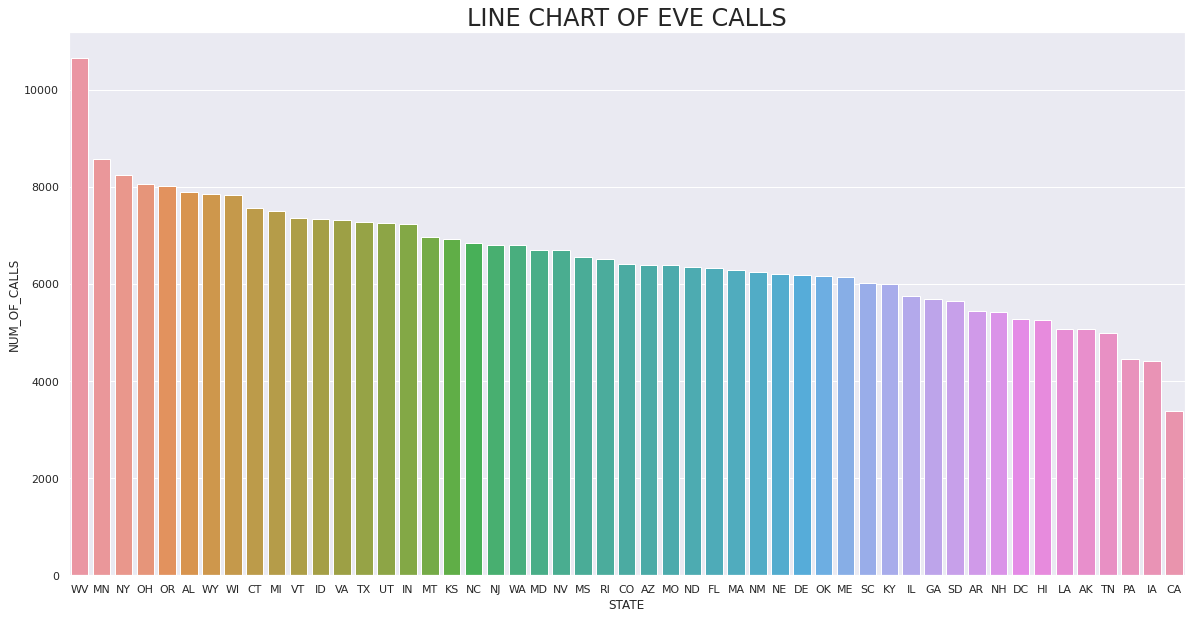

In [ ]:
day_calls_statewise =df.groupby('State',as_index=False)['Total night calls'].sum().sort_values('Total night calls',ascending=False)
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
ax = sns.barplot(x="State", y="Total night calls",data=day_calls_statewise)
ax.set_title("LINE CHART OF EVE CALLS",size=24) 
ax.set_xlabel("STATE",size=12) 
ax.set_ylabel("NUM_OF_CALLS",size=12) 

Text(0, 0.5, 'NUM_OF_CALLS')

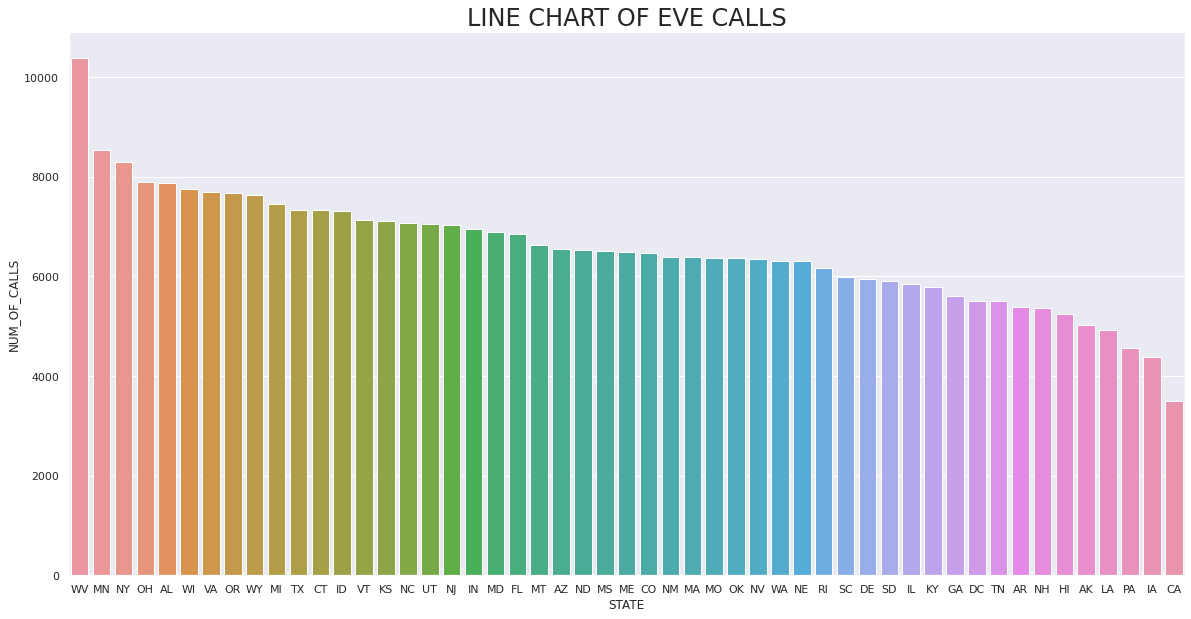

In [ ]:
day_calls_statewise =df.groupby('State',as_index=False)['Total eve calls'].sum().sort_values('Total eve calls',ascending=False)
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
ax = sns.barplot(x="State", y="Total eve calls",data=day_calls_statewise)
ax.set_title("LINE CHART OF EVE CALLS",size=24) 
ax.set_xlabel("STATE",size=12) 
ax.set_ylabel("NUM_OF_CALLS",size=12)

In [ ]:
df['total Day Charge per minute']=df['Total day charge']/df['Total day minutes']
df['total Eve Charge per minute']=df['Total eve charge']/df['Total eve minutes']
df['total Night Charge per minute']=df['Total night charge']/df['Total night minutes']
df['total Intl Charge per minute']=df['Total intl charge']/df['Total intl minutes']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total Day Charge per minute,total Eve Charge per minute,total Night Charge per minute,total Intl Charge per minute
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0.170011,0.085005,0.044994,0.270000
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0.169988,0.085013,0.045008,0.270073
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.170008,0.084983,0.045018,0.269672
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.170007,0.084976,0.044997,0.269697
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0.170006,0.085030,0.044997,0.270297


To analyse the data in depth we have to divide and conquer.
Since the columns of data represent the total we shall divide them for individual data.


In [ ]:
required_columns=['State','Total day calls','total Day Charge per minute','Total eve calls','total Eve Charge per minute','Total night calls','total Night Charge per minute','Total intl calls','total Intl Charge per minute']
charges_df=df[required_columns]
charge1=charges_df.groupby('State').mean().copy().reset_index()
charge1=charge1[['State','total Day Charge per minute','total Night Charge per minute','total Intl Charge per minute','total Eve Charge per minute']]

Text(0, 0.5, 'CHARGES')

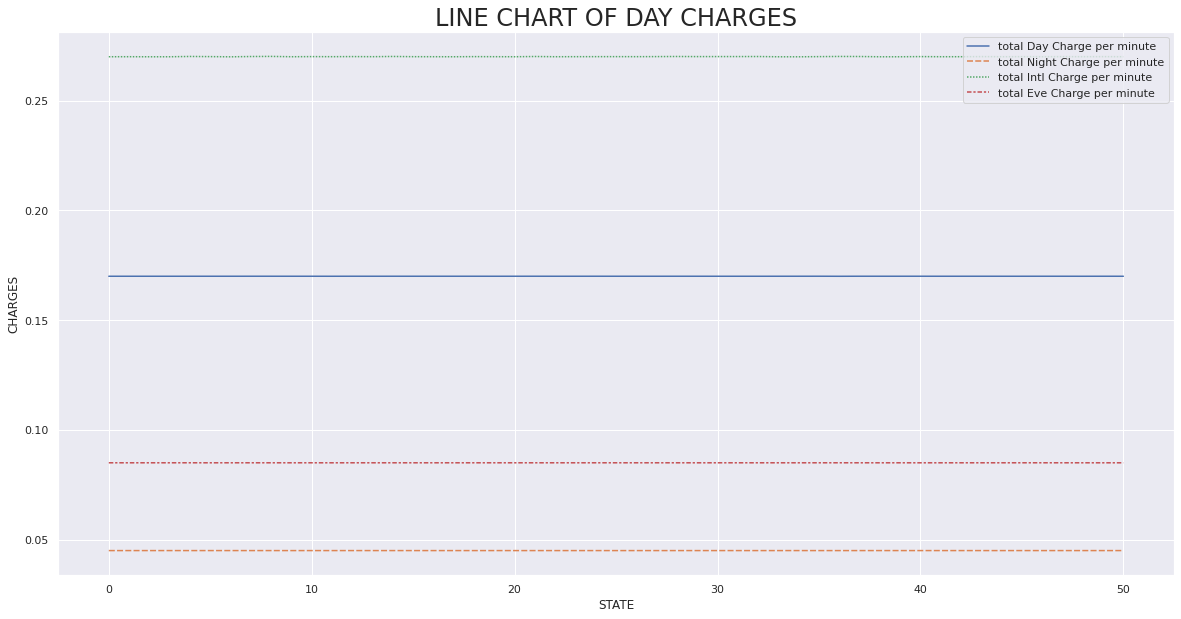

In [ ]:
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
sns.lineplot(data=charge1)
ax.set_title("LINE CHART OF DAY CHARGES",size=24) 
ax.set_xlabel("STATE",size=12) 
ax.set_ylabel("CHARGES",size=12) 

Here we can observe that there is no fluctuation of charges for different states per minutes

Text(0, 0.5, 'Charges')

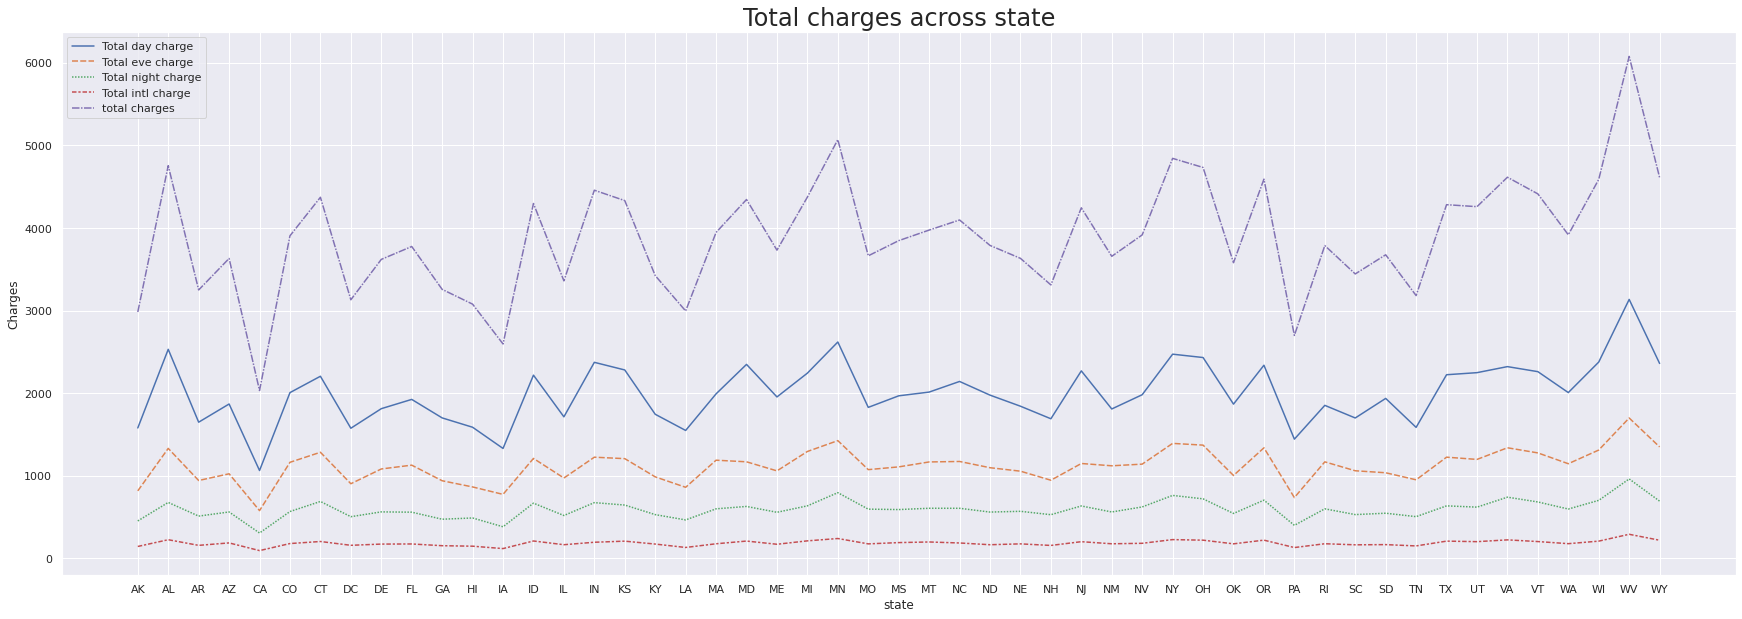

In [ ]:
# extract the charges per state 
df['total charges']=df['Total day charge']+df['Total eve charge']+df['Total night charge']+df['Total intl charge']
# Plot a line plot for the charges so that we could visualise the distribution of overall charges.
line_chart_state_charge=df.groupby('State').agg({'Total day charge':'sum','Total eve charge':'sum','Total night charge':'sum','Total intl charge':'sum','total charges':'sum'})
#plot code
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.lineplot(data=line_chart_state_charge)
ax.set_title( "Total charges across state" , size = 24 )
ax.set_xlabel( "state" , size = 12 )
ax.set_ylabel( "Charges" , size = 12 )

In [ ]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total Day Charge per minute,total Eve Charge per minute,total Night Charge per minute,total Intl Charge per minute,total charges
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,0.170011,0.085005,0.044994,0.27,75.56


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'total Day Charge per minute', 'total Eve Charge per minute',
       'total Night Charge per minute', 'total Intl Charge per minute',
       'total charges'],
      dtype='object')

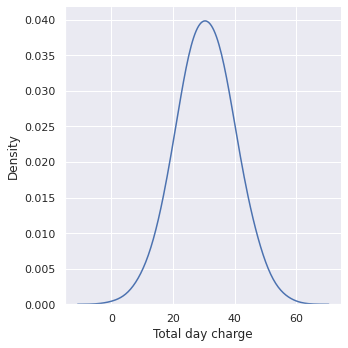

In [ ]:
sns.displot(df, x="Total day charge", kind="kde", bw_adjust=2)

# Let us now check the impact of outliers


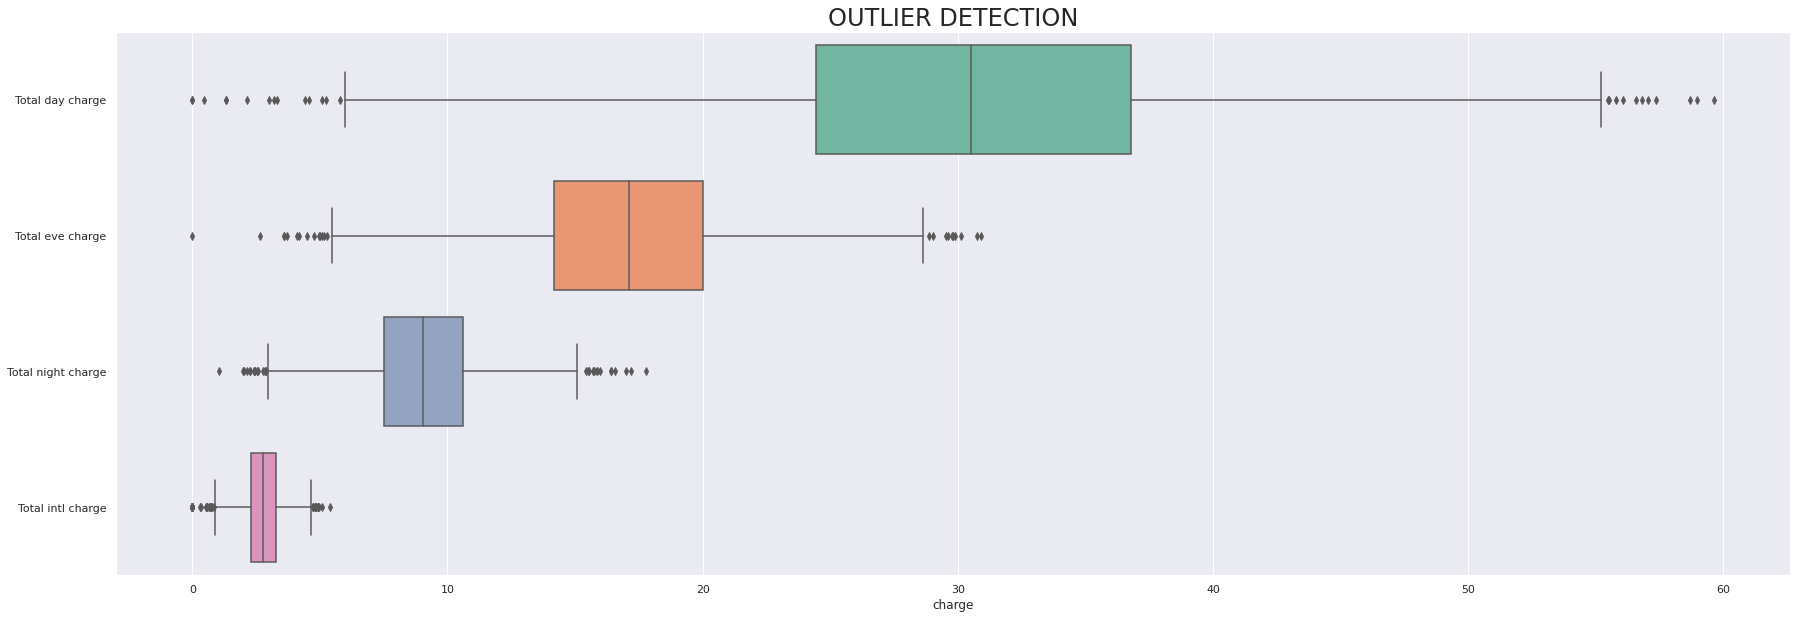

In [ ]:
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.boxplot(data=df[['Total day charge','Total eve charge','Total night charge','Total intl charge']], orient="h", palette="Set2")
ax.set_title( "OUTLIER DETECTION" , size = 24 )
ax.set_xlabel( "charge" , size = 12 )
fig.savefig('OUTLIER DETECTION')

In [ ]:
# for international  charges
quartile_q1 = np.percentile(df['Total intl charge'],25)

quartile_q2 = np.percentile(df['Total intl charge'],50)

quartile_q3 = np.percentile(df['Total intl charge'],75)

quartile_q4 = np.percentile(df['Total intl charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

df['Total intl charge'][(df['Total intl charge']>= upper_limit)] = np.median(df['Total intl charge'])
df['Total intl charge'][(df['Total intl charge']<= lower_limit)] = np.median(df['Total intl charge'])

# For day charges

quartile_q1 = np.percentile(df['Total day charge'],25)

quartile_q2 = np.percentile(df['Total day charge'],50)

quartile_q3 = np.percentile(df['Total day charge'],75)

quartile_q4 = np.percentile(df['Total day charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

df['Total day charge'][(df['Total day charge']>= upper_limit)] = np.median(df['Total day charge'])
df['Total day charge'][(df['Total day charge']<= lower_limit)] = np.median(df['Total day charge'])

#FOR EVE CHARGE

quartile_q1 = np.percentile(df['Total eve charge'],25)

quartile_q2 = np.percentile(df['Total eve charge'],50)

quartile_q3 = np.percentile(df['Total eve charge'],75)

quartile_q4 = np.percentile(df['Total eve charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

df['Total eve charge'][(df['Total eve charge']>= upper_limit)] = np.median(df['Total eve charge'])
df['Total eve charge'][(df['Total eve charge']<= lower_limit)] = np.median(df['Total eve charge'])

# FOR NIGHT CHARGE

quartile_q1 = np.percentile(df['Total night charge'],25)

quartile_q2 = np.percentile(df['Total night charge'],50)

quartile_q3 = np.percentile(df['Total night charge'],75)

quartile_q4 = np.percentile(df['Total night charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

df['Total night charge'][(df['Total night charge']>= upper_limit)] = np.median(df['Total night charge'])
df['Total night charge'][(df['Total night charge']<= lower_limit)] = np.median(df['Total night charge'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to b

Text(0.5, 0, 'charge')

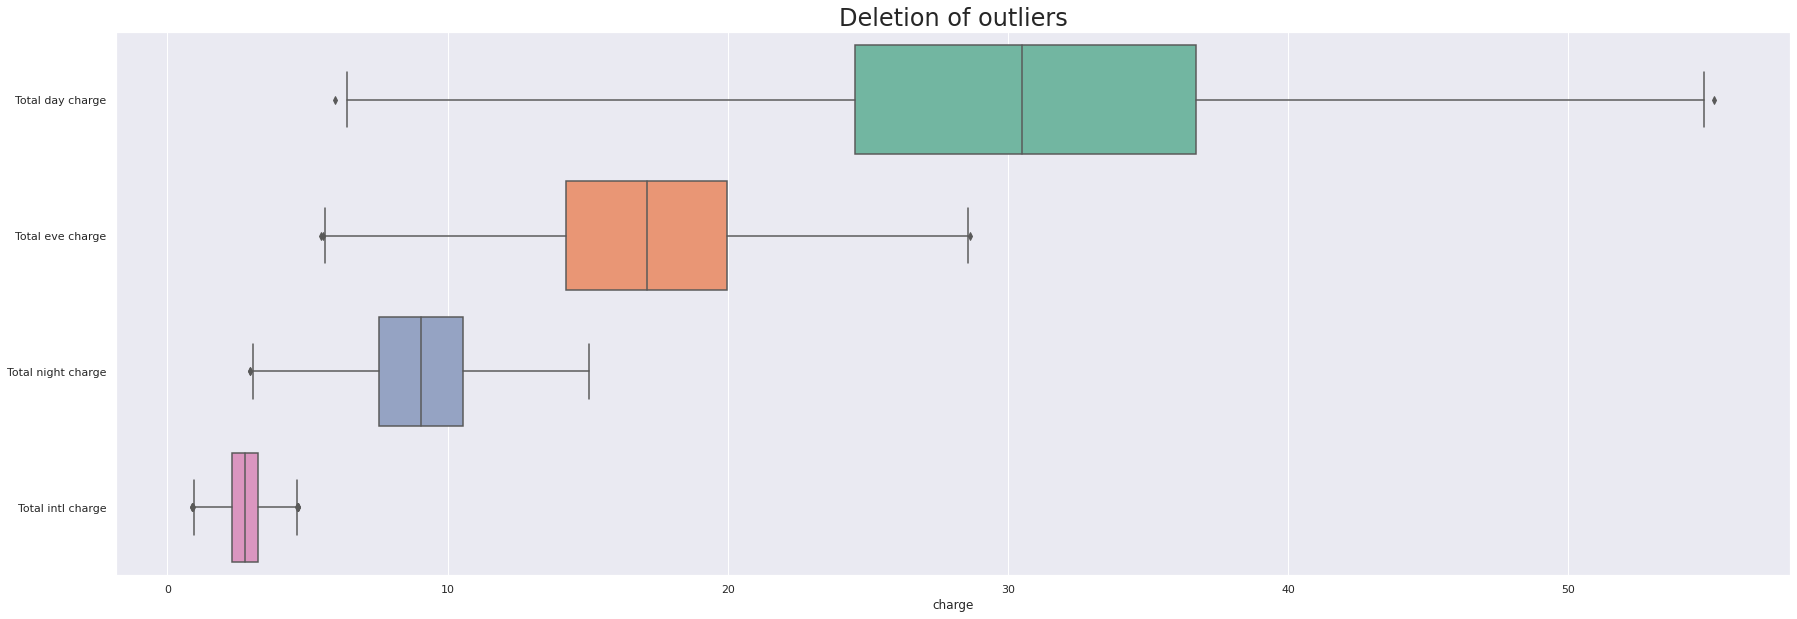

In [ ]:
# create a box plot after deletion of outlier datas
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.boxplot(data=df[['Total day charge','Total eve charge','Total night charge','Total intl charge']], orient="h", palette="Set2")
ax.set_title( "Deletion of outliers" , size = 24 )
ax.set_xlabel( "charge" , size = 12 )

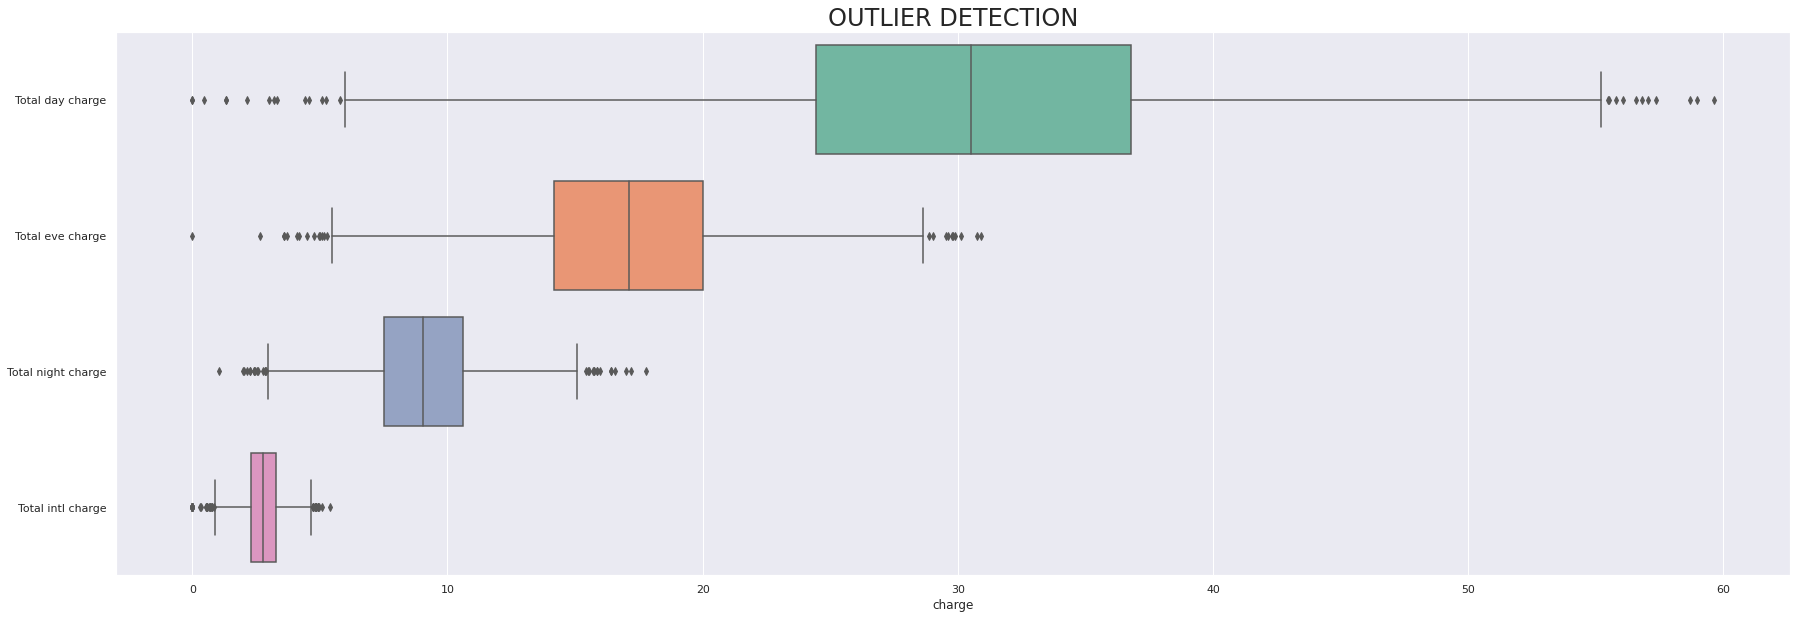

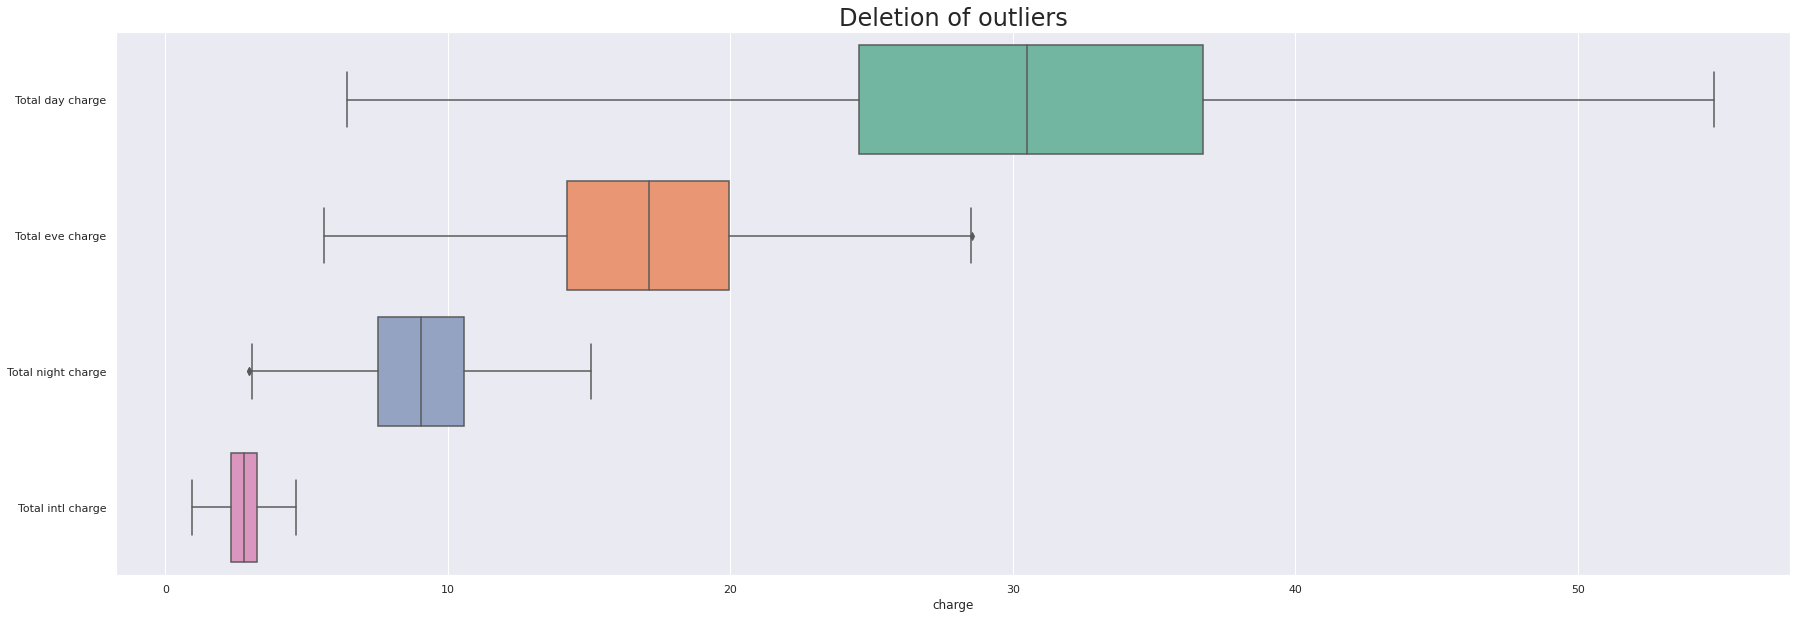

There is no major changes after the deletion of outliers


In [ ]:
df.groupby('Churn').agg({'Account length':'mean'})

,Account length
Churn,
False,100.793684
True,102.664596


Text(0.5, 0, 'Account length')

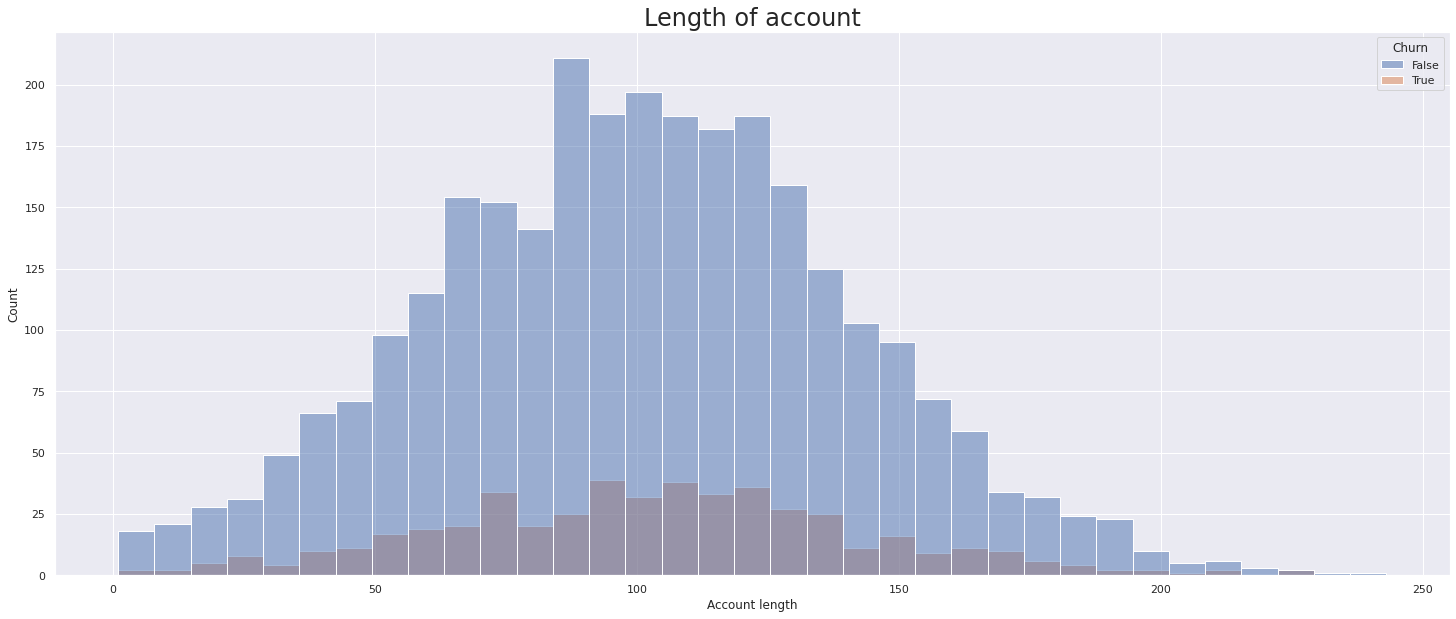

In [ ]:
fig, ax = plt.subplots(figsize = (25, 10 ))
sns.histplot(data=df,x='Account length',hue="Churn")
ax.set_title( "Length of account" , size = 24 )
ax.set_xlabel( "Account length" , size = 12 )

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'total Day Charge per minute', 'total Eve Charge per minute',
       'total Night Charge per minute', 'total Intl Charge per minute',
       'total charges'],
      dtype='object')

## step 1.3 : BI- variate Analysis

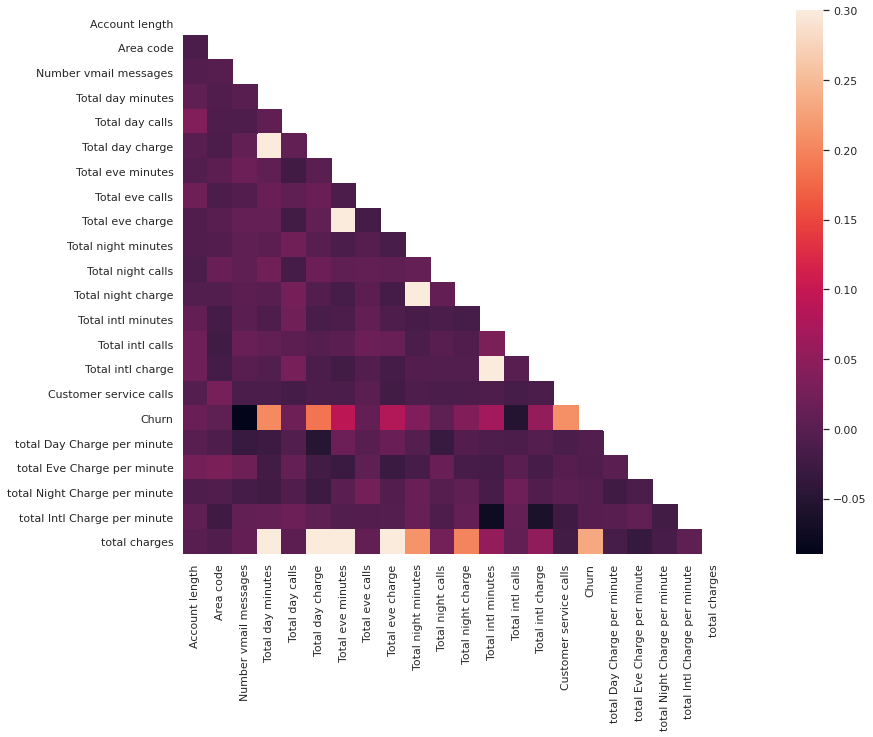

In [ ]:
df_corr =df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    sns.heatmap(df_corr, mask=mask, vmax=.3, square=True)
    f.savefig('heat map')

Our main goal is extract the respnsible factor for churn rate.So we use heatmap to set the correlation between the variable of Customer_left_df.


We can understand there is strong relationship between 


1.   Number vmail messages vs churn
2.   total day charge and total day calls vs churn

1.   Total international charge vs Churn
2.   Customer service calls vs churn

---



---



> So we are plotting a scatter plot for the above mentioned variables












Text(0.5, 1.0, 'Total intl charge vs Number vmail messages')

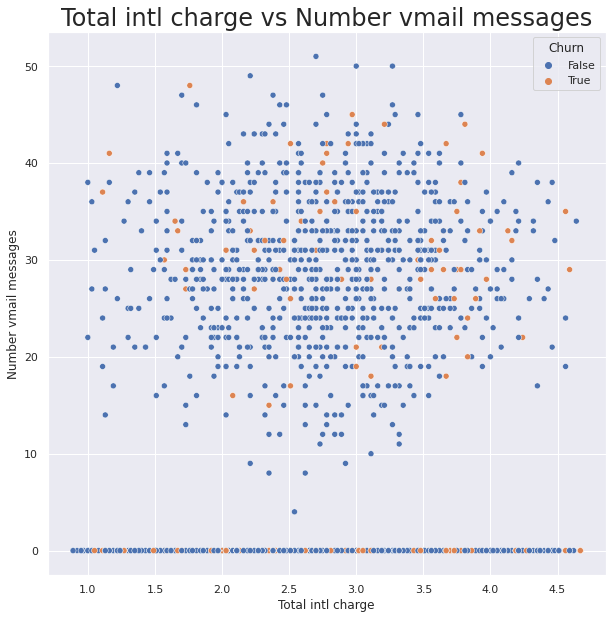

In [ ]:
# Scatter plot (Number vmail messages vs Total international charge)
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=df, x="Total intl charge", y="Number vmail messages", hue='Churn')
ax.set_title( "Total intl charge vs Number vmail messages" , size = 24 )

Text(0.5, 1.0, 'Total day charge vs Number vmail messages')

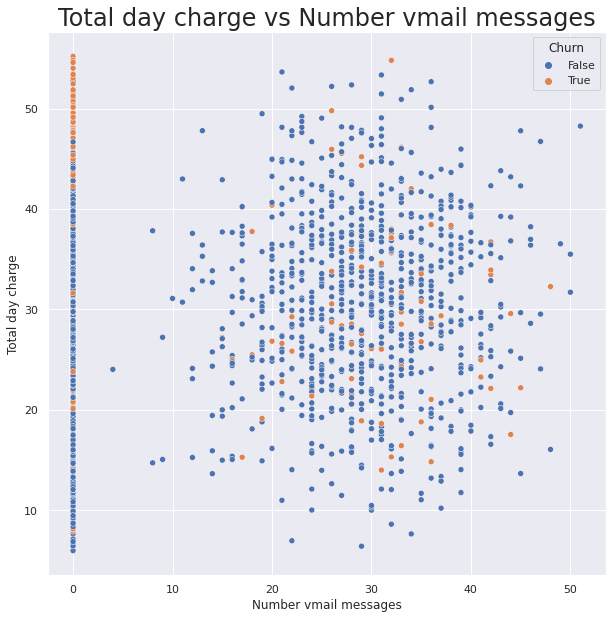

In [ ]:
# Scatter plot (Number vmail messages vs Total day charge)
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=df, x="Number vmail messages", y="Total day charge", hue='Churn')
ax.set_title( "Total day charge vs Number vmail messages" , size = 24 )

Text(0.5, 1.0, 'Customer service calls vs Number vmail messages')

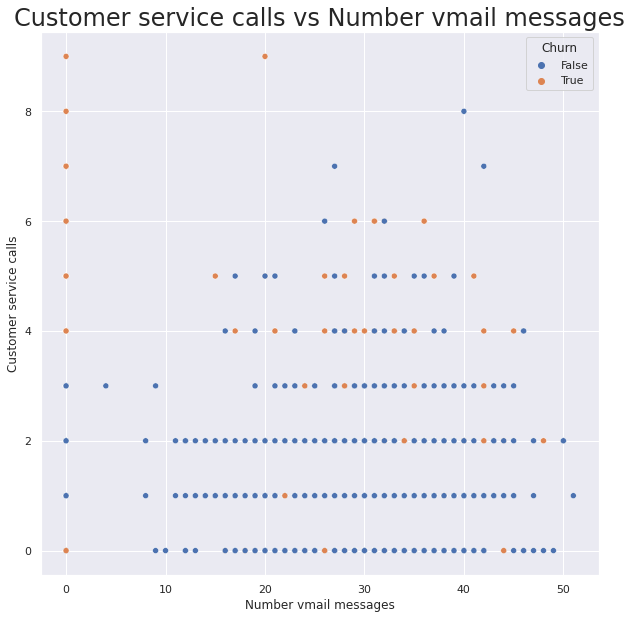

In [ ]:
# Scatter plot (Number vmail messages vs Customer service calls)
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=df, x="Number vmail messages", y="Customer service calls", hue='Churn')
ax.set_title( "Customer service calls vs Number vmail messages" , size = 24 )

Text(0.5, 1.0, 'Total day charge vs Customer service calls')

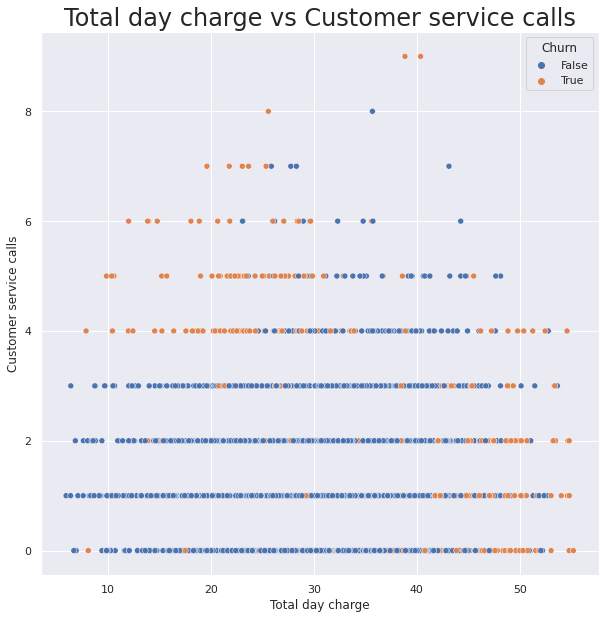

In [ ]:
# Scatter plot (Total day charge vs Customer service calls)
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=df, x="Total day charge", y="Customer service calls", hue='Churn')
ax.set_title( "Total day charge vs Customer service calls" , size = 24 )

Text(0.5, 1.0, 'Total day charge vs Total intl charge')

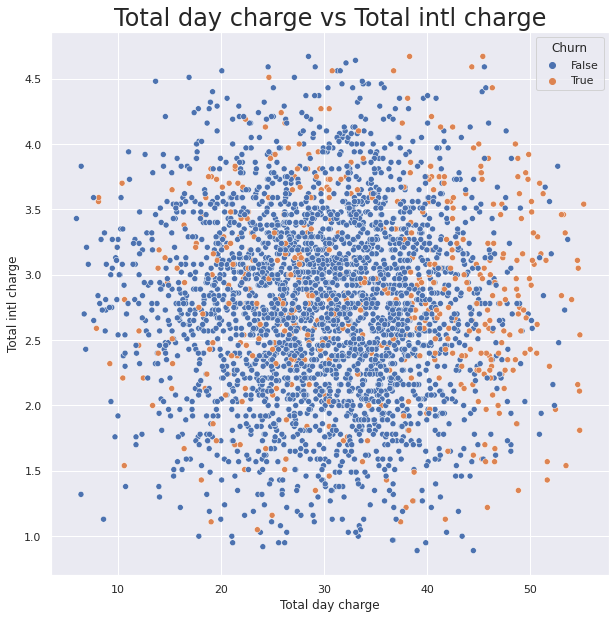

In [ ]:
# Scatter plot (Total day charge vs Total intl charge)
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=df, x="Total day charge", y="Total intl charge", hue='Churn')
ax.set_title( "Total day charge vs Total intl charge" , size = 24 )

here we can see that the day charge higher than 40 tends to have higher attrition rate

Text(0.5, 1.0, 'Customer service calls vs Total intl charge')

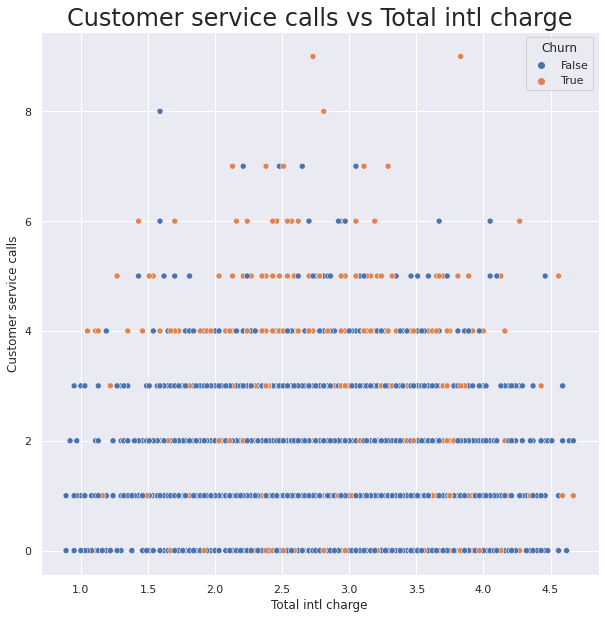

In [ ]:
# Scatter plot (Customer service callsvs Total intl charge)
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=df, y="Customer service calls", x="Total intl charge", hue='Churn')
ax.set_title( "Customer service calls vs Total intl charge" , size = 24 )

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'total Day Charge per minute', 'total Eve Charge per minute',
       'total Night Charge per minute', 'total Intl Charge per minute',
       'total charges'],
      dtype='object')

Here we can observe that when customer calls reaches more than 4 they tend to have high probability of churn

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


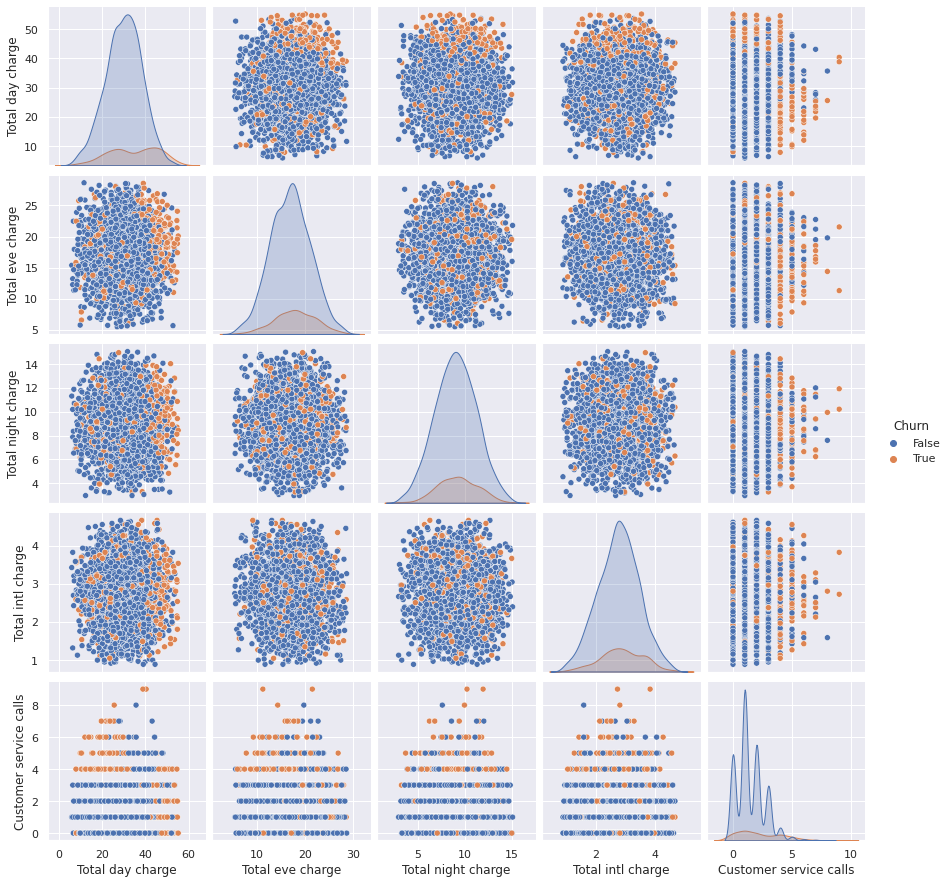

In [ ]:
# scatter plot for various variable
sns.set()
cols = ['Churn','International plan', 'Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Customer service calls']
sns.pairplot(df[cols], size = 2.5,hue='Churn')
plt.show();

# **Conclusion**
The above analysis is done on three level namely Data preparation, univariate analysis and bivariate analysis.Initally we have to understand who are our target customer and we should analyse who among them are loyal customers.
As Loyal customers are the one who encourages and promote our service legibly.
Churning of customers are normal in current scenerio however our loyal customer should not be allowed to churn which indirectly means we lack in our performance


1.   The above data analysis shows that even the customer with higher account length is also churning which must be avoided primarily.
2.   The customer service and International plan are the primary variables to focus on for further improvement.
3.   The establishment of voice mail plan for emergency is an attractive marketing strategy that could be adopted in predictive model

Our action should be authentic to the "why" we have started.

Thank you. !!!





